In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [3]:


# Load the CSV file, skipping bad lines
df = pd.read_csv('/Users/saquibhazari/DEVELOPERS/Machine_learning/Regression/Sample - Superstore.csv', sep=',', encoding='ISO-8859-1', on_bad_lines='skip')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [7]:
df.columns = [col.lower() for col in df.columns].copy()
df.columns

Index(['row id', 'order id', 'order date', 'ship date', 'ship mode',
       'customer id', 'customer name', 'segment', 'country', 'city', 'state',
       'postal code', 'region', 'product id', 'category', 'sub-category',
       'product name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [8]:
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [9]:
df.columns = df.columns.str.replace('-', '_')
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [10]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [11]:
df['ship_date'] = pd.to_datetime(df['ship_date'])

In [12]:
df.head(3)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [13]:
df.dtypes

row_id                    int64
order_id                 object
order_date       datetime64[ns]
ship_date        datetime64[ns]
ship_mode                object
customer_id              object
customer_name            object
segment                  object
country                  object
city                     object
state                    object
postal_code               int64
region                   object
product_id               object
category                 object
sub_category             object
product_name             object
sales                   float64
quantity                  int64
discount                float64
profit                  float64
dtype: object

In [14]:
df.isna().sum()

row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub_category     0
product_name     0
sales            0
quantity         0
discount         0
profit           0
dtype: int64

In [15]:
df.isnull().sum()

row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub_category     0
product_name     0
sales            0
quantity         0
discount         0
profit           0
dtype: int64

In [16]:
df.loc[df.duplicated(subset=['order_id', 'customer_id', 'product_id'])].head(5)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
352,353,CA-2016-129714,2016-09-01,2016-09-03,First Class,AB-10060,Adam Bellavance,Home Office,United States,New York City,...,10009,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,49.120,4,0.0,23.0864
431,432,US-2016-123750,2016-04-15,2016-04-21,Standard Class,RB-19795,Ross Baird,Home Office,United States,Gastonia,...,28052,South,TEC-AC-10004659,Technology,Accessories,Imation Secure+ Hardware Encrypted USB 2.0 Fla...,291.960,5,0.2,54.7425
1301,1302,CA-2016-137043,2016-12-23,2016-12-25,Second Class,LC-17140,Logan Currie,Consumer,United States,Springfield,...,22153,South,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",286.380,3,0.0,83.0502
3184,3185,CA-2017-152912,2017-11-09,2017-11-12,Second Class,BM-11650,Brian Moss,Corporate,United States,Columbia,...,21044,East,OFF-ST-10003208,Office Supplies,Storage,Adjustable Depth Letter/Legal Cart,544.380,3,0.0,157.8702
3406,3407,US-2014-150119,2014-04-23,2014-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,...,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [17]:
df.query('order_id == "CA-2016-129714"')

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
349,350,CA-2016-129714,2016-09-01,2016-09-03,First Class,AB-10060,Adam Bellavance,Home Office,United States,New York City,...,10009,East,TEC-AC-10000290,Technology,Accessories,Sabrent 4-Port USB 2.0 Hub,6.790,1,0.0,2.3086
350,351,CA-2016-129714,2016-09-01,2016-09-03,First Class,AB-10060,Adam Bellavance,Home Office,United States,New York City,...,10009,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,24.560,2,0.0,11.5432
351,352,CA-2016-129714,2016-09-01,2016-09-03,First Class,AB-10060,Adam Bellavance,Home Office,United States,New York City,...,10009,East,OFF-BI-10002160,Office Supplies,Binders,Acco Hanging Data Binders,3.048,1,0.2,1.0668
352,353,CA-2016-129714,2016-09-01,2016-09-03,First Class,AB-10060,Adam Bellavance,Home Office,United States,New York City,...,10009,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,49.120,4,0.0,23.0864
353,354,CA-2016-129714,2016-09-01,2016-09-03,First Class,AB-10060,Adam Bellavance,Home Office,United States,New York City,...,10009,East,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,4355.168,4,0.2,1415.4296


In [18]:
df = df.loc[~df.duplicated(subset=['order_id', 'customer_id', 'product_id'])] \
      .reset_index(drop=True).copy()

In [19]:
df.loc[df.duplicated(subset=['order_id', 'customer_id', 'product_id'])].head(5)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit


In [20]:
df.shape

(9986, 21)

In [21]:
df.describe()

,row_id,order_date,ship_date,postal_code,sales,quantity,discount,profit
count,9986.000000,9986,9986,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000
mean,4998.275786,2016-04-29 23:06:30.066092544,2016-05-03 22:06:48.091327744,55206.139595,229.872779,3.789305,0.156258,28.641480
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2500.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.248000,2.000000,0.000000,1.728000
50%,4998.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,57103.000000,54.384000,3.000000,0.200000,8.641350
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.917500,5.000000,0.200000,29.353800
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2884.759278,NaN,NaN,32066.718706,623.477775,2.225286,0.206499,234.349134


In [22]:
# Removing timezone information from datetime columns
df['order_date'] = df['order_date'].dt.tz_localize(None)
df['ship_date'] = df['ship_date'].dt.tz_localize(None)

In [23]:
df.describe()

,row_id,order_date,ship_date,postal_code,sales,quantity,discount,profit
count,9986.000000,9986,9986,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000
mean,4998.275786,2016-04-29 23:06:30.066092544,2016-05-03 22:06:48.091327744,55206.139595,229.872779,3.789305,0.156258,28.641480
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2500.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.248000,2.000000,0.000000,1.728000
50%,4998.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,57103.000000,54.384000,3.000000,0.200000,8.641350
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.917500,5.000000,0.200000,29.353800
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2884.759278,NaN,NaN,32066.718706,623.477775,2.225286,0.206499,234.349134


In [24]:
# Finding the Univeriates
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

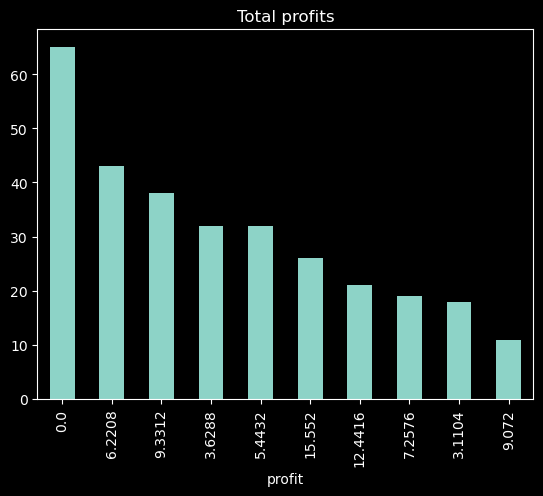

In [25]:
df['profit'].value_counts().head(10).plot(kind='bar', title='Total profits')
plt.show()

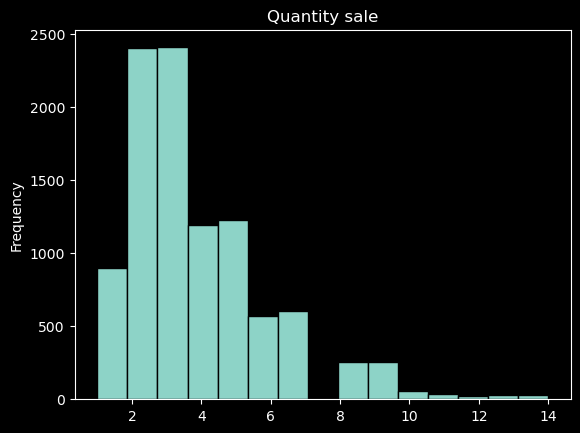

In [26]:
df['quantity'].plot(kind='hist', bins=15, edgecolor='black', title='Quantity sale')
plt.show()

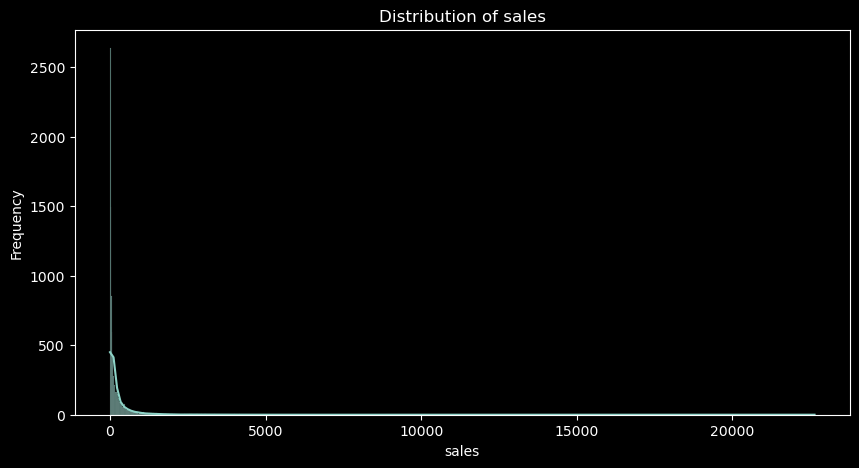

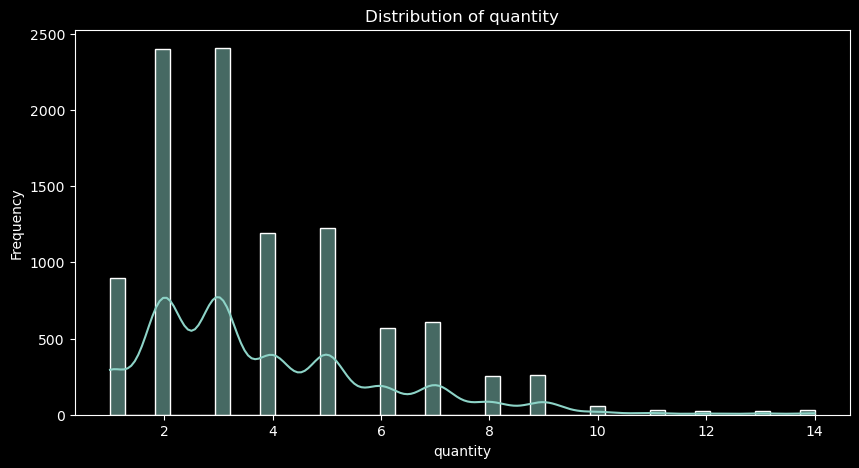

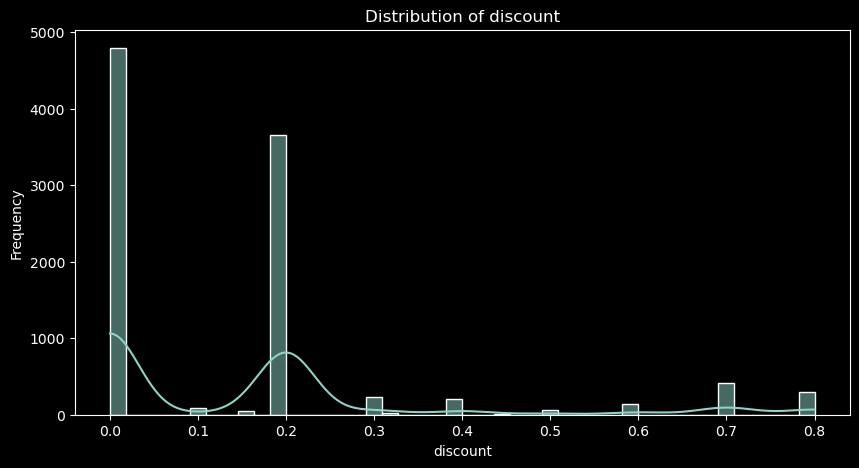

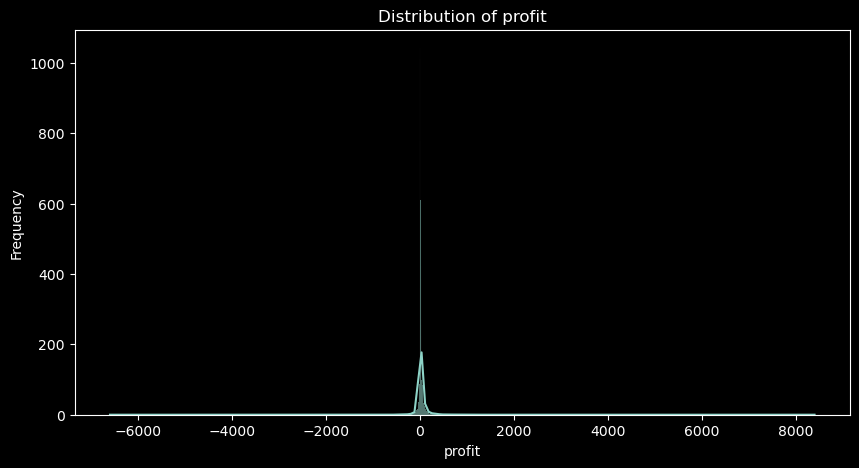

In [27]:
# Feature engineering

continuous_vars = ['sales', 'quantity', 'discount', 'profit']
for var in continuous_vars:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

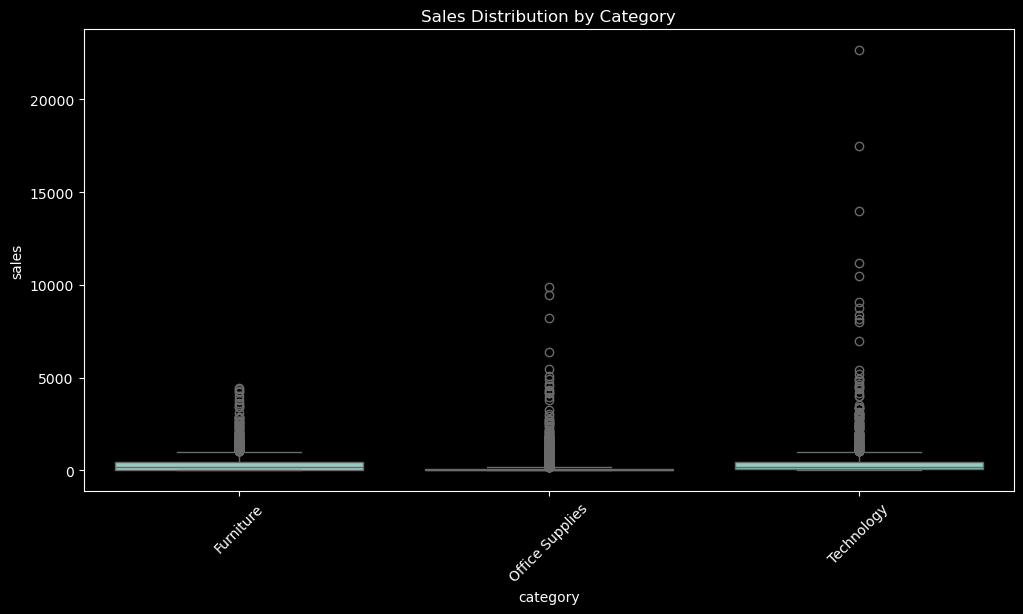

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='category', y='sales')
plt.title('Sales Distribution by Category')
plt.xticks(rotation=45)
plt.show()

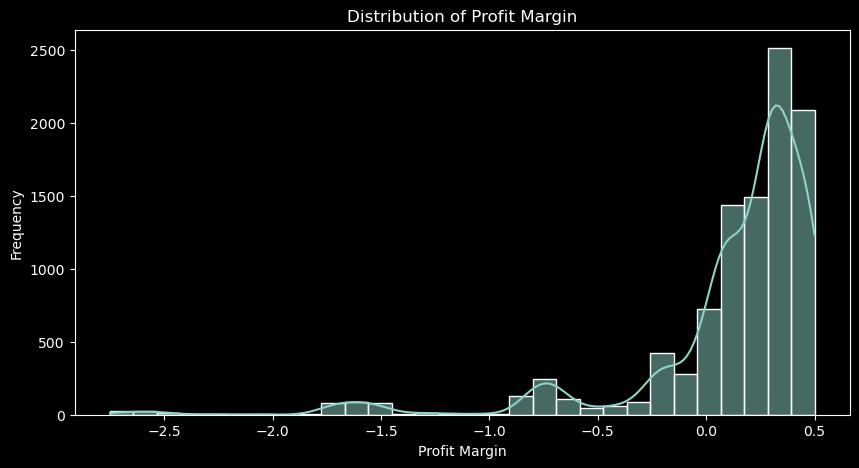

In [29]:
df['profit_margin'] = df['profit'] / df['sales']
plt.figure(figsize=(10, 5))
sns.histplot(df['profit_margin'], bins=30, kde=True)
plt.title('Distribution of Profit Margin')
plt.xlabel('Profit Margin')
plt.ylabel('Frequency')
plt.show()

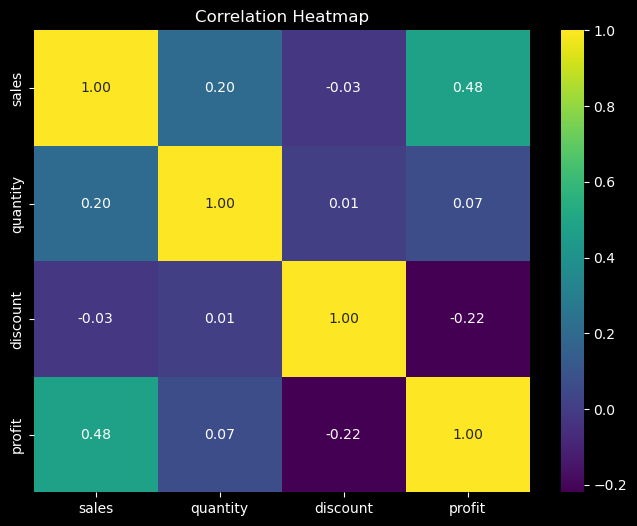

In [30]:
correlation = df[['sales', 'quantity', 'discount', 'profit']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [31]:
df.shape

(9986, 22)

In [33]:
df.to_csv('super_store.csv', index=False)